## notebook assess the massql query for identifying all di BA
- based on diagnostic peaks defined in the respective v_boxplot_all_di notebooks

In [3]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [5]:
massql_query_output = pd.read_csv('/home/jovyan/work/notebooks/outputs/massql_all_di_query_peaks_nl.csv',sep=',', index_col='scan')

In [6]:
massql_query_output

,precmz,ms1scan,rt,charge,i,i_norm,mslevel,i_norm_ms1
scan,,,,,,,,
CCMSLIB00000478541,403.284,0,0,1,1.196320e+06,1,2,NaN
CCMSLIB00001059061,450.322,0,0,1,3.481760e+05,1,2,NaN
CCMSLIB00003134721,357.278,0,0,1,8.734154e+05,1,2,NaN
CCMSLIB00003135494,357.279,0,0,1,1.903372e+06,1,2,NaN
CCMSLIB00003138468,357.279,0,0,1,4.341742e+06,1,2,NaN
...,...,...,...,...,...,...,...,...
CCMSLIB00006693275,375.289,0,0,1,4.500471e+06,1,2,NaN
CCMSLIB00006693286,375.289,0,0,1,4.790841e+06,1,2,NaN
CCMSLIB00006704612,375.289,0,0,1,5.083604e+06,1,2,NaN


In [7]:
massql_query_ids = massql_query_output.index.to_list()

### match massql data with original GNPS data to fill in missing metadata

In [8]:
# from v_get_ALL_GNPS_input_library.ipynb

input_library_full_df_loaded = pd.read_parquet('/home/jovyan/work/notebooks/outputs/ALL_GNPS_input_library.gzip')

In [9]:
input_library_no_suspect_list = input_library_full_df_loaded[~input_library_full_df_loaded['library_membership'].str.contains('suspect',case=False,na=False)]

In [10]:
adduct_labels = ['M+H','[M+H]','[M+H]+']

In [11]:
input_library = input_library_no_suspect_list[input_library_no_suspect_list["Adduct"].isin(adduct_labels)]

In [12]:
len(input_library)

245648

In [13]:
massql_query_output_matched = input_library[input_library["spectrum_id"].isin(massql_query_ids)]

In [14]:
massql_query_output_matched

,spectrum_id,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,submit_user,...,Ion_Mode,create_time,task_id,user_id,InChIKey_smiles,InChIKey_inchi,Formula_smiles,Formula_inchi,url,annotation_history
2367,CCMSLIB00000478541,P2_C1_conc_GE1_01_2419.mzXML,d8fa66096dfb40cab2074831aacb390d,1589,2,GNPS-LIBRARY,1,"[[70.838120,260.000000],[91.053917,4036.000000...",splash10-00kr-0955000000-0955000000,tal_lk,...,Positive,2015-05-12 15:08:32.0,d8fa66096dfb40cab2074831aacb390d,null,UTGBBPSEQPITLF-URCDZZQSSA-N,,C25H38O4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '146436-22-8'..."
3030,CCMSLIB00001059061,f.abouslimani/Steroids standards and calbratio...,a641523f65a146f7922eafdc1d5fe972,2073,2,GNPS-LIBRARY,1,"[[75.553253,20.000000],[76.039009,500.000000],...",null-null-null-null,abouslimani,...,Positive,2017-03-24 18:05:45.0,a641523f65a146f7922eafdc1d5fe972,null,GHCZAUBVMUEKKP-GYPHWSFCSA-N,,C26H43NO5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '640-79-9', '..."
5039,CCMSLIB00005436491,f.MSV000081477/ccms_peak/mzXML/Plate6/C220_GA7...,578f8becb8314aca9a3bbce6621eaed1,1374,2,GNPS-LIBRARY,1,"[[105.074013,83.000000],[107.084953,199.000000...",null-null-null-null,lfnothias,...,Positive,2019-08-12 16:02:45.0,578f8becb8314aca9a3bbce6621eaed1,null,CYHFCBVFHBCQHF-UHFFFAOYSA-N,,C35H50N2O5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
5040,CCMSLIB00005436492,f.MSV000082480/ccms_peak/mzXML/A23_120_20.mzML;,a5a766d2747549f5a154ebc66d15ecce,1873,2,GNPS-LIBRARY,1,"[[50.455456,678.341980],[51.303623,899.186401]...",null-null-null-null,lfnothias,...,Positive,2019-08-12 16:05:12.0,a5a766d2747549f5a154ebc66d15ecce,null,CEMZGPKUKMFNNF-UHFFFAOYSA-N,,C33H49NO5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
5041,CCMSLIB00005436493,f.lfnothias/TEMP/CCMSLIB_adding_clustered.mgf;,6e683fa377d749bd919b6fce3c27b881,1,2,GNPS-LIBRARY,1,"[[81.070137,109557.789062],[93.070023,43555.72...",null-null-null-null,lfnothias,...,Positive,2019-12-10 17:02:03.0,6adb63dbdf0242e884f871b3142f68eb,null,CYHFCBVFHBCQHF-UHFFFAOYSA-N,,C35H50N2O5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537907,CCMSLIB00004704781,library_mgf.mgf,39bd0963a5bd44e98ff5ca3424152ec7,13718,2,MONA,1,"[[50.421204,0.152033],[50.886135,0.147745],[51...",null-null-null-null,mwang87,...,positive,2018-10-09 11:01:37.0,39bd0963a5bd44e98ff5ca3424152ec7,null,ZHUOOEGSSFNTNP-HWAYZWBCSA-N,,C25H42O4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': '[M+H]+', 'CAS_Number': 'N/A', 'Ch..."
538074,CCMSLIB00004704948,library_mgf.mgf,39bd0963a5bd44e98ff5ca3424152ec7,13885,2,MONA,1,"[[50.158161,0.029037],[50.536938,0.024375],[50...",null-null-null-null,mwang87,...,positive,2018-10-09 11:01:37.0,39bd0963a5bd44e98ff5ca3424152ec7,null,KXGVEGMKQFWNSR-LLQZFEROSA-N,,C24H40O4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': '[M+H]+', 'CAS_Number': 'N/A', 'Ch..."
538075,CCMSLIB00004704949,library_mgf.mgf,39bd0963a5bd44e98ff5ca3424152ec7,13886,2,MONA,1,"[[50.452003,0.386258],[50.565144,0.175170],[51...",null-null-null-null,mwang87,...,positive,2018-10-09 11:01:37.0,39bd0963a5bd44e98ff5ca3424152ec7,null,KXGVEGMKQFWNSR-LLQZFEROSA-N,,C24H40O4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': '[M+H]+', 'CAS_Number': 'N/A', 'Ch..."
556742,CCMSLIB00006680045,library_mgf.mgf,b5ba94d05e8946279b404f527bbccc3e,1775,2,MONA,1,"[[55.054680,1.900000],[59.540081,1.400000],[76...",null-null-null-null,mpanitchpakdi,...,positive,2021-07-20 19:42:49.0,b5ba94d05e8946279b404f527bbccc3e,null,GHCZAUBVMUEKKP-GYPHWSFCSA-N,None,C26H43NO5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': 'N/A', 'Charg..."


In [15]:
#input_library_full_df_loaded[input_library_full_df_loaded["spectrum_id"].isin(massql_query_ids)][input_library_full_df_loaded[input_library_full_df_loaded["spectrum_id"].isin(massql_query_ids)].Smiles == 'N/A'][['spectrum_id','Compound_Name']]

### validating massql query output with substructure identified di BA IDs

In [16]:
# from v_di_3_7_M+H_substruct_df_for_manuscript.ipynb

library_df_w_all_di = pd.read_csv('/home/jovyan/work/notebooks/outputs/library_df_dihydroxy_BA_only_m+h_matches.csv',sep=',', index_col='spectrum_id')

In [17]:
massql_query_output_matched_SMILES = massql_query_output_matched['Smiles'].dropna().unique()

In [18]:
massql_query_output_matched_SMILES_no_na = np.delete(massql_query_output_matched_SMILES, np.where(massql_query_output_matched_SMILES == 'N/A'))

In [19]:
len(massql_query_output_matched_SMILES_no_na)

140

In [20]:
len(massql_query_output_matched_SMILES)

141

In [21]:
library_df_w_all_di_SMILES = library_df_w_all_di['Smiles'].dropna().unique()

In [22]:
len(library_df_w_all_di_SMILES)

197

#### venn diagrams

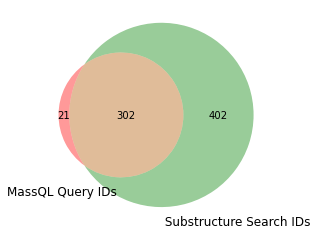

In [26]:
venn2([set(massql_query_output_matched['spectrum_id'].dropna().unique()), set(library_df_w_all_di.index.dropna().unique())],
      set_labels = ('MassQL Query IDs ', ' Substructure Search IDs'))
plt.show()

In [27]:
len(set(massql_query_output_matched['spectrum_id'].dropna().unique())-set(library_df_w_all_di.index.dropna().unique()))

21

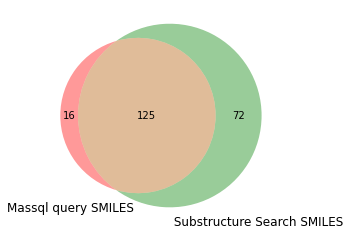

In [28]:
venn2([set(massql_query_output_matched['Smiles'].dropna().unique()), set(library_df_w_all_di['Smiles'].dropna().unique())],
      set_labels = ('Massql query SMILES ', ' Substructure Search SMILES'))
plt.show()

##### assessing red section

In [29]:
set(massql_query_output_matched['Smiles'].dropna().unique())-set(library_df_w_all_di['Smiles'].dropna().unique())

{' ',
 'C[C@@H]([C@H]1CC[C@]2([H])[C@]1(C)CC[C@@]3([H])[C@@]2([H])CC[C@@]4([H])[C@]3(C)CCC(C4)=O)CCC(O)=O',
 'C[C@@H]([C@H]1CC[C@]2([H])[C@]1(C)CC[C@@]3([H])[C@@]2([H])CC[C@@]4([H])[C@]3(C)CC[C@@H](O)C4)C[C@@H](O)C(O)=O',
 'C[C@@H]([C@H]1CC[C@]2([H])[C@]1(C)CC[C@@]3([H])[C@@]2([H])CC[C@@]4([H])[C@]3(C)CC[C@@H](O)[C@@H]4O)CCC(O)=O',
 'C[C@@H]([C@H]1CC[C@]2([H])[C@]1(C)CC[C@@]3([H])[C@@]2([H])CC[C@]4([H])[C@]3(C)CC[C@@H](O)C4)CCC(O)=O',
 'C[C@@H]([C@H]1CC[C@]2([H])[C@]1(C)[C@@H](O)C[C@@]3([H])[C@@]2([H])[C@H](O)C[C@@]4([H])[C@]3(C)CC[C@@H](O)C4)CCC(O)C(C)C(O)=O',
 'C[C@@H]([C@H]1CC[C@]2([H])[C@]1(C)[C@@H](O)C[C@@]3([H])[C@@]2([H])[C@H](O)C[C@@]4([H])[C@]3(C)CC[C@@H](O)C4)CC[C@@H](O)[C@@H](C)C(O)=O',
 'C[C@@H]([C@H]1CC[C@]2([H])[C@]1(C)[C@@H](O)C[C@@]3([H])[C@@]2([H])[C@H](O)C[C@@]4([H])[C@]3(C)CC[C@@H](O)C4)CC[C@H](O)[C@H](C)C(O)=O',
 'C[C@H](CC/C(=N/CC(=O)O)/O)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2[C@@H](C[C@H]4[C@@]3(CC[C@H](C4)O)C)O)C',
 'C[C@H](CC/C(=N/CC(=O)O)/O)[C@H]1CC[C@H]2[C@H]3[C

In [30]:
massql_query_output_matched_are_na_SMILES = massql_query_output_matched[massql_query_output_matched['Smiles'].isin(['N/A',' '])]

In [31]:
massql_query_output_matched_are_na_SMILES[['spectrum_id','Compound_Name','Smiles']]

,spectrum_id,Compound_Name,Smiles
3030,CCMSLIB00001059061,GLYCOCHENODEOXYCHOLIC ACID,
5358,CCMSLIB00005466095,Threonine conjugated chenodeoxycholic acid,
537906,CCMSLIB00004704780,Methyl Deoxycholate,N/A
537907,CCMSLIB00004704781,Methyl Deoxycholate,N/A
538074,CCMSLIB00004704948,Deoxycholic Acid,N/A
538075,CCMSLIB00004704949,Deoxycholic Acid,N/A


In [32]:
not_substruct_matched_SMILES = set(massql_query_output_matched['Smiles'].dropna().unique())-set(library_df_w_all_di['Smiles'].dropna().unique())

In [33]:
len(not_substruct_matched_SMILES)

16

In [34]:
not_substruct_matched_SMILES_no_nan = not_substruct_matched_SMILES-set(['N/A',' '])

In [35]:
len(not_substruct_matched_SMILES_no_nan)

14

In [36]:
not_substruct_matched_SMILES_with_number = pd.DataFrame(not_substruct_matched_SMILES_no_nan)

In [37]:
not_substruct_matched = [Chem.MolFromSmiles(x) for x in not_substruct_matched_SMILES_no_nan]

In [38]:
len(not_substruct_matched)

14

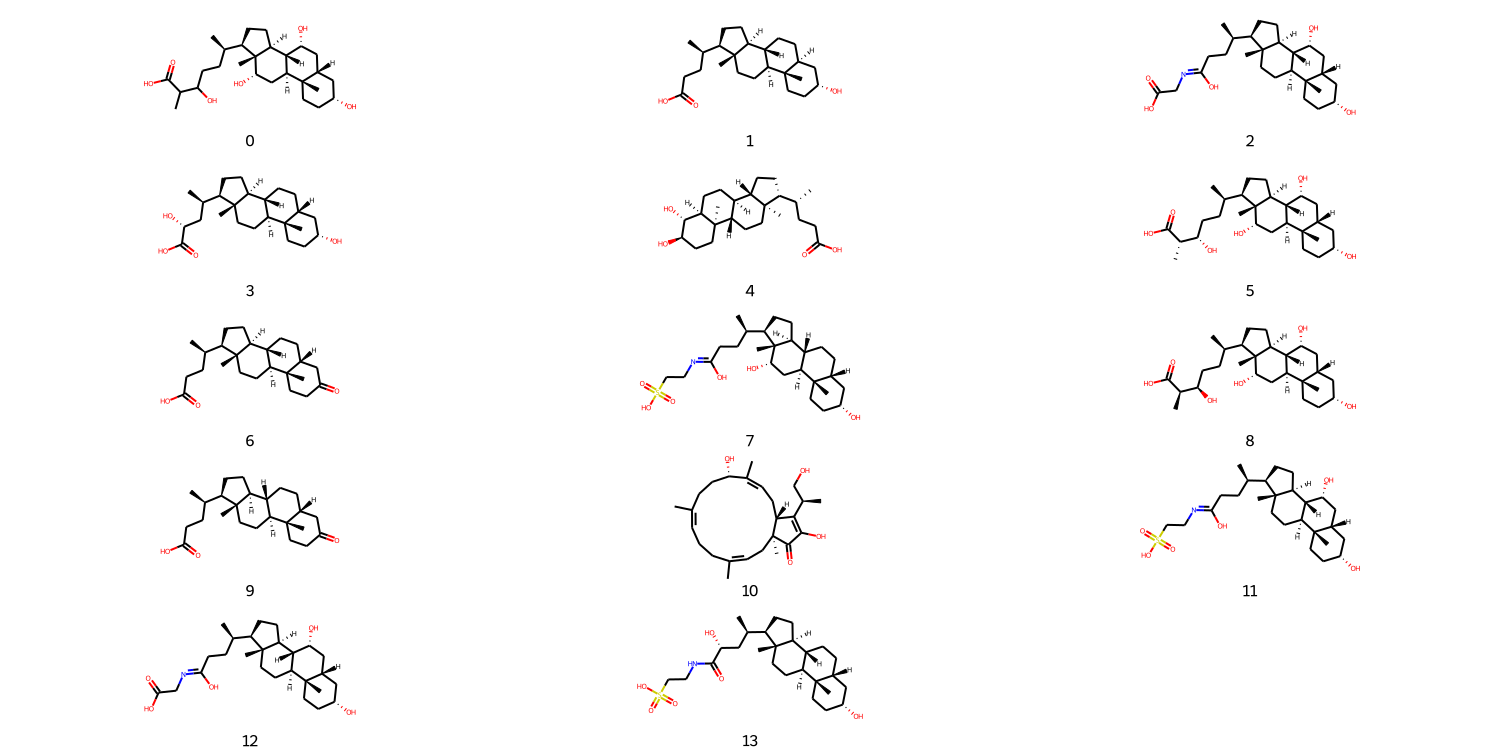

In [39]:
Draw.MolsToGridImage(not_substruct_matched,subImgSize=(500,150), useSVG = False, maxMols=100,
                     legends=[num for num in not_substruct_matched_SMILES_with_number.index.astype(str).to_list()])

##### assessing green section

In [40]:
not_in_massql_SMILES = set(library_df_w_all_di['Smiles'].dropna().unique())-set(massql_query_output_matched['Smiles'].dropna().unique())

In [41]:
len(not_in_massql_SMILES)

72

In [42]:
not_in_massql_SMILES_with_number = pd.DataFrame(not_in_massql_SMILES)

In [43]:
not_in_massql_SMILES_with_number

,0
0,O=C(O)CCC(C)C1CCC2C3CCC4CC(O)CCC4(C)C3CC(O)C12C
1,C[C@H](CCC(=O)O)[C@H]1CC[C@H]2[C@@H]3[C@@H](O)...
2,C[C@H](CCC(N[C@H](C(O)=O)CC1=CNC=N1)=O)[C@H]2C...
3,[H][C@@]12CC[C@@H]3C[C@H](O)CC[C@]3(C)[C@H]1C[...
4,C[C@@H]([C@H]1CC[C@]2([H])[C@]1(C)CC[C@@]3([H]...
...,...
67,C[C@H](CCC(=O)NCCS(=O)(=O)O)[C@H]1CC[C@@H]2[C@...
68,C[C@H](CCC(N[C@H](C(O)=O)CC1=CNC2=C1C=CC=C2)=O...
69,C[C@H](CCC(N[C@H](C(O)=O)CCCNC(N)=N)=O)[C@H]1C...
70,C[C@H](CCC(=O)O)[C@H]1CC[C@@H]2[C@@]1([C@H](C[...


In [44]:
not_in_massql = [Chem.MolFromSmiles(x) for x in not_in_massql_SMILES]

In [45]:
len(not_in_massql)

72

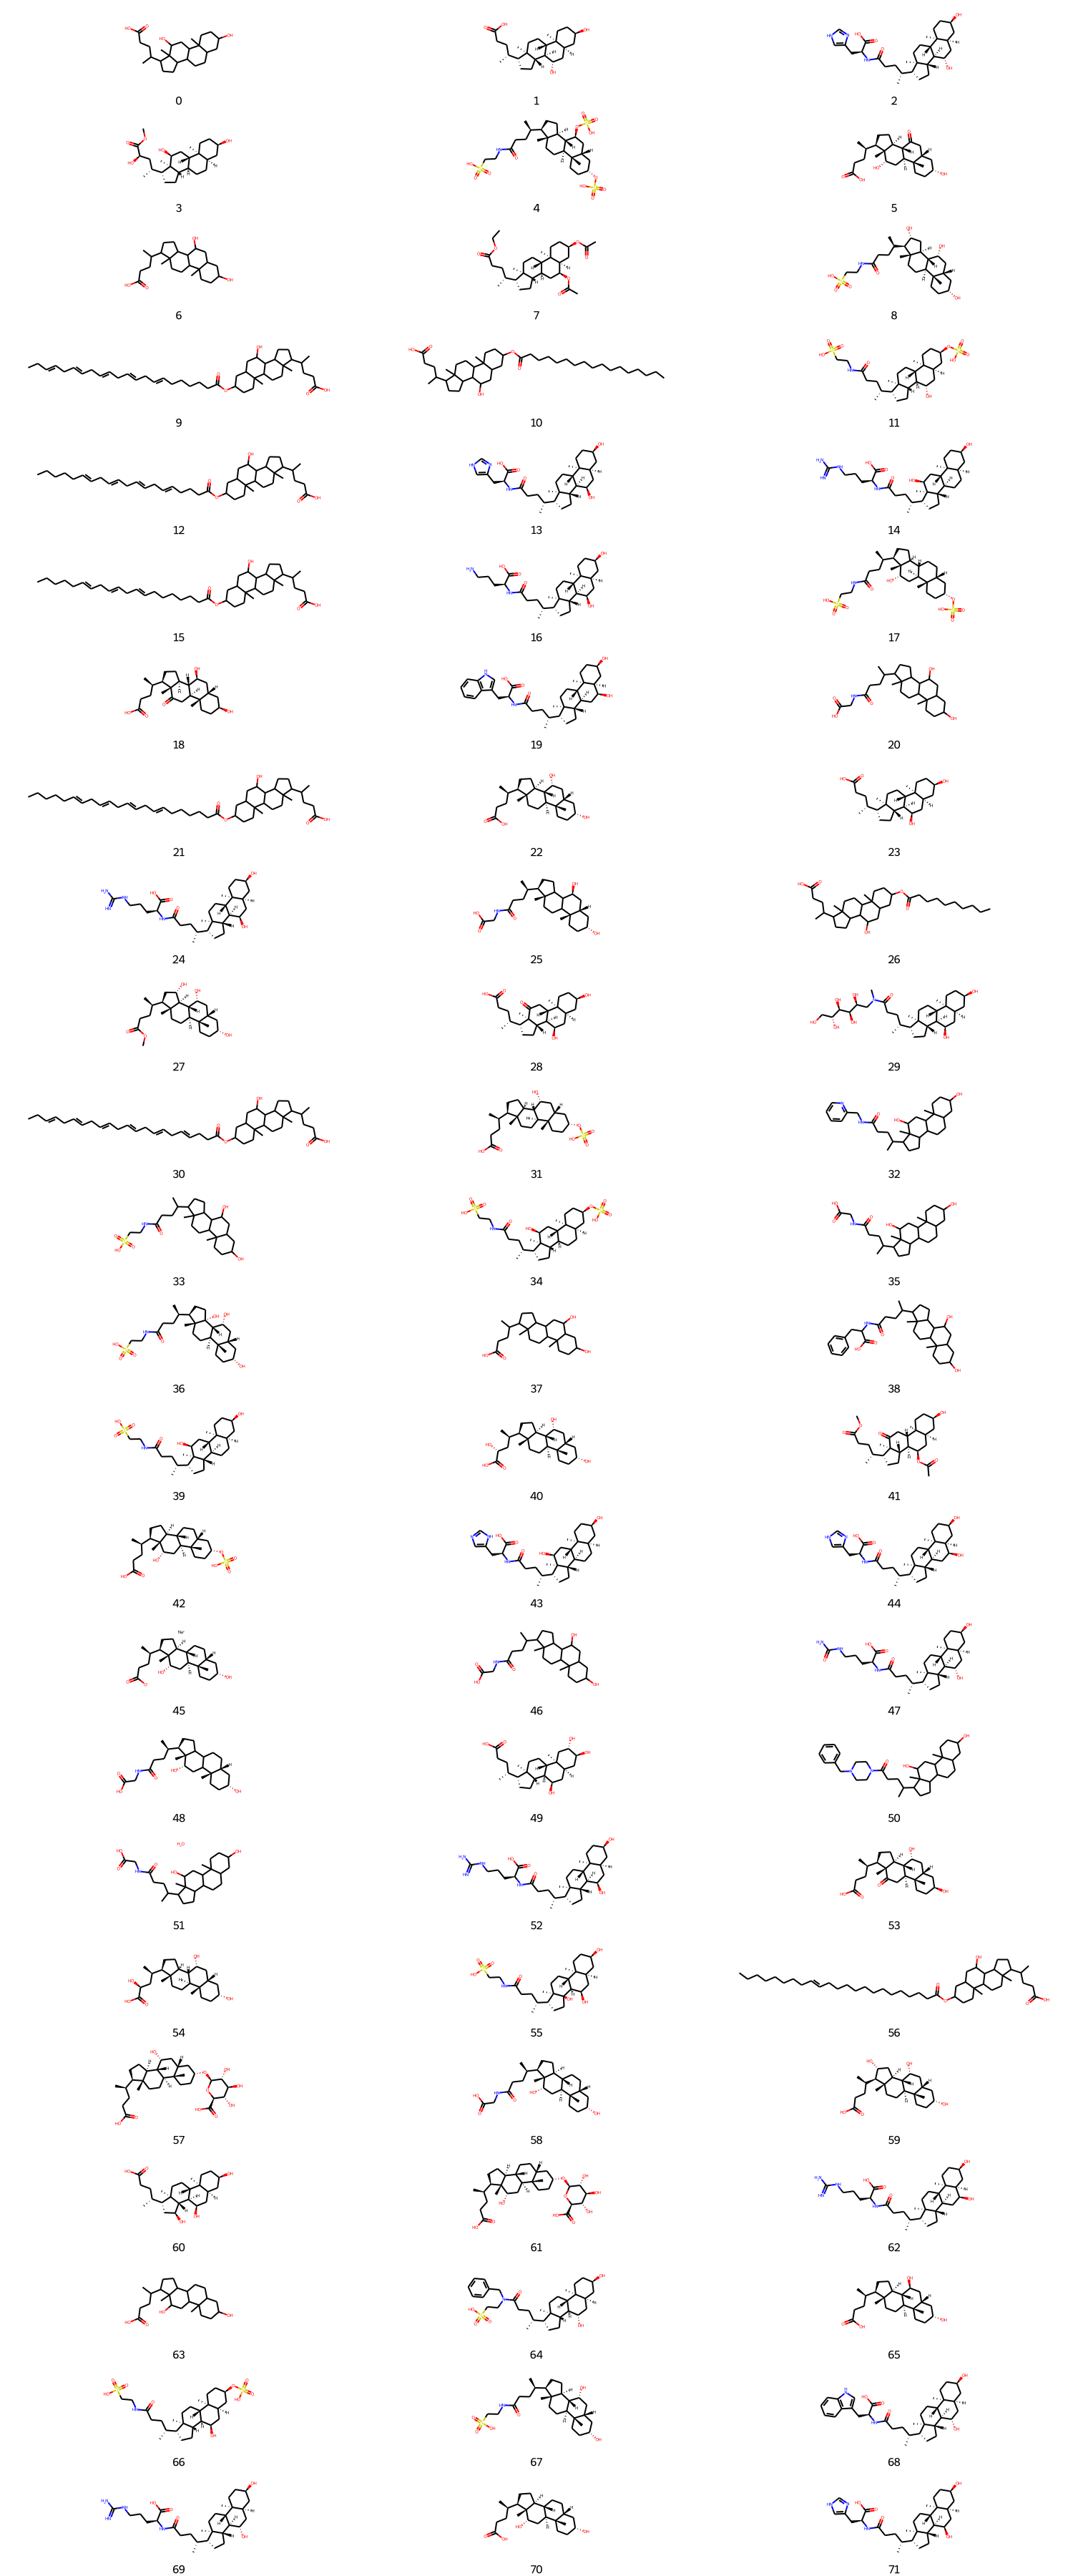

In [46]:
Draw.MolsToGridImage(not_in_massql,subImgSize=(500,150), useSVG = False, maxMols=100,
                     legends=[num for num in not_in_massql_SMILES_with_number.index.astype(str).to_list()])

In [47]:
index_to_drop_because_tri = [5,8,18,27,28,36,41,49,53,59,60]

In [49]:
not_in_massql_SMILES_with_number.drop(not_in_massql_SMILES_with_number.index[index_to_drop_because_tri], inplace=True)

In [50]:
not_in_massql_SMILES_with_number

,0
0,O=C(O)CCC(C)C1CCC2C3CCC4CC(O)CCC4(C)C3CC(O)C12C
1,C[C@H](CCC(=O)O)[C@H]1CC[C@H]2[C@@H]3[C@@H](O)...
2,C[C@H](CCC(N[C@H](C(O)=O)CC1=CNC=N1)=O)[C@H]2C...
3,[H][C@@]12CC[C@@H]3C[C@H](O)CC[C@]3(C)[C@H]1C[...
4,C[C@@H]([C@H]1CC[C@]2([H])[C@]1(C)CC[C@@]3([H]...
...,...
67,C[C@H](CCC(=O)NCCS(=O)(=O)O)[C@H]1CC[C@@H]2[C@...
68,C[C@H](CCC(N[C@H](C(O)=O)CC1=CNC2=C1C=CC=C2)=O...
69,C[C@H](CCC(N[C@H](C(O)=O)CCCNC(N)=N)=O)[C@H]1C...
70,C[C@H](CCC(=O)O)[C@H]1CC[C@@H]2[C@@]1([C@H](C[...


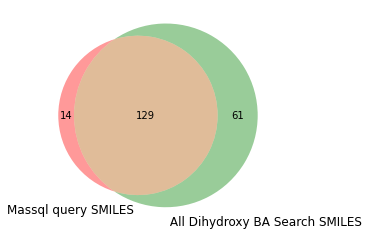

In [52]:
# 4 dihydroxy compounds added from NA table to the 125 originally found in venn

venn2(subsets = (len(not_substruct_matched_SMILES_no_nan),len(not_in_massql_SMILES_with_number),129),
      set_labels = ('Massql query SMILES ', ' All Dihydroxy BA Search SMILES'))
plt.show()